In [0]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 585.6MB 23kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x61714000 @  0x7fce3fd072a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
    100% |████████████████████████████████| 112kB 2.7MB/s 
    100% |████████████████████████████████| 61kB 21.4MB/s 
    100% |████████████████████████████████| 9.0MB 3.9MB/s 
    100% |████████████████████████████████| 112kB 29.8MB/s 
    100% |████████████████████████████████| 112kB 28.7MB/s 
    100% |████████████████████████████████| 1.0MB 21.9MB/s 
    100% |████████████████████████████████| 2.2MB 12.3MB/s 
  Running setup.py bdist_wheel for prometheus-client ... - done
  Stored in directory: /root/.cac

In [0]:
!pip install kaggle

    100% |████████████████████████████████| 61kB 2.2MB/s 
    100% |████████████████████████████████| 235kB 7.1MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/8b/21/3b/a0076243c6ae12a6215b2da515fe06b539aee7217b406e510e
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [0]:
# import pandas as pd
# import numpy as np

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.vision import *


%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor
import cv2
import shutil
import PIL

In [0]:
from google.colab import files
files.upload()

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c quickdraw-doodle-recognition -f test_simplified.csv -p data

 98% 58.0M/59.0M [00:00<00:00, 63.7MB/s]
100% 59.0M/59.0M [00:00<00:00, 82.0MB/s]


In [0]:
!kaggle competitions download -c quickdraw-doodle-recognition -f train_simplified.zip -p data

100% 7.36G/7.37G [01:34<00:00, 127MB/s]
100% 7.37G/7.37G [01:34<00:00, 83.7MB/s]


In [0]:
!ls

data  kaggle.json  sample_data


In [0]:
!cd ../

In [0]:
import os
os.chdir('data')

In [0]:
!unzip train_simplified.zip -d train

Archive:  train_simplified.zip
  inflating: train/fence.csv         
  inflating: train/yoga.csv          
  inflating: train/horse.csv         
  inflating: train/sandwich.csv      
  inflating: train/cat.csv           
  inflating: train/camouflage.csv    
  inflating: train/mosquito.csv      
  inflating: train/see saw.csv       
  inflating: train/onion.csv         
  inflating: train/grapes.csv        
  inflating: train/chandelier.csv    
  inflating: train/stitches.csv      
  inflating: train/sink.csv          
  inflating: train/trumpet.csv       
  inflating: train/cell phone.csv    
  inflating: train/skyscraper.csv    
  inflating: train/hourglass.csv     
  inflating: train/donut.csv         
  inflating: train/ceiling fan.csv   
  inflating: train/bowtie.csv        
  inflating: train/lipstick.csv      
  inflating: train/suitcase.csv      
  inflating: train/moon.csv          
  inflating: train/dishwasher.csv    
  inflating: train/mermaid.csv       
  inflating: train/

In [0]:
%cd /content/data/train/

/content/data/train


In [0]:
df = pd.read_csv('dog.csv')

In [0]:
df.head()

,countrycode,drawing,key_id,recognized,timestamp,word
0,US,"[[[115, 110, 111, 130, 132, 125], [45, 52, 60,...",6718004173733888,True,2017-03-01 21:44:26.601760,dog
1,KR,"[[[66, 65, 72, 81], [48, 11, 0, 41]], [[61, 28...",5319657680535552,True,2017-03-05 10:02:39.659490,dog
2,AE,"[[[149, 138, 119, 107, 97, 52, 51, 59, 76, 98,...",6665679493136384,True,2017-03-05 10:43:54.155920,dog
3,US,"[[[185, 114, 59, 16, 4, 0, 0, 6, 22, 60, 118, ...",6099729773494272,True,2017-03-05 04:37:45.214010,dog
4,US,"[[[96, 98, 73, 50, 30, 19, 0, 2, 13, 23, 68, 1...",4831731276316672,True,2017-03-10 22:40:57.248030,dog


In [0]:
def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

In [0]:
%%time
def get_counts(path): return (path.stem, pd.read_csv(path).shape[0])
with ThreadPoolExecutor(12) as e: counts = list(e.map(get_counts, Path('/content/data/train/').iterdir()))

CPU times: user 6min 30s, sys: 32.2 s, total: 7min 2s
Wall time: 4min 58s


In [0]:
BASE_SIZE = 256
def draw_cv2(raw_strokes, size=256, lw=4, time_color=False):
    img = np.zeros((BASE_SIZE, BASE_SIZE), np.uint8)
    for t, stroke in enumerate(raw_strokes):
        for i in range(len(stroke[0]) - 1):
            color = 255 - min(t, 10) * 13 if time_color else 255
            _ = cv2.line(img, (stroke[0][i], stroke[1][i]),
                         (stroke[0][i + 1], stroke[1][i + 1]), color, lw)
    img = cv2.copyMakeBorder(img,4,4,4,4,cv2.BORDER_CONSTANT)
    if size != BASE_SIZE:
        return cv2.resize(img, (size, size), interpolation=cv2.INTER_LINEAR)
    else:
        return img

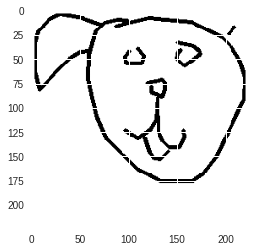

In [0]:
plt.imshow(draw_cv2(eval(df.loc[0, 'drawing']), size=224))

In [0]:
'''
sz = 128 # size
r = 0.01 # portion of images to keep, we want only 1% of total train data
shutil.rmtree(f'data/train-{sz}', ignore_errors=True) # deleting whatever we have saved earlier
os.makedirs(f'data/train-{sz}') # best to have where to save the images
'''

In [0]:
sz = 224 # size
r = 0.2 # portion of images to keep, we want only 1% of total train data
shutil.rmtree(f'data/train-{sz}', ignore_errors=True) # deleting whatever we have saved earlier
os.makedirs(f'data/train-{sz}') # best to have where to save the images

In [0]:
def save_ims_from_df(path):
    df = pd.read_csv(path)
    selected = df[df.recognized==True].sample(int(r * df.shape[0]))
    for row in selected.iterrows():
        idx, drawing, label = row[0], eval(row[1].drawing), '_'.join(row[1].word.split())
        ary = draw_cv2(drawing, size=128)
        rgb_ary = np.repeat(ary[:,:,None], 3, -1)
        PIL.Image.fromarray(rgb_ary).save(f'data/train-{sz}/{label}_{idx}.png')

In [0]:
sz

In [0]:
%%time
with ThreadPoolExecutor(12) as e: e.map(save_ims_from_df, Path('/content/data/train/').iterdir())

In [0]:
!ls data/train-{sz} -lhS | head -n 10

In [0]:
PIL.Image.open(f'data/train-{sz}/blackberry_119360.png')

In [0]:
df = pd.read_csv('/content/data/test_simplified.csv')

In [0]:
df.head()

In [0]:

df.shape

In [0]:
shutil.rmtree(f'data/test-{sz}', ignore_errors=True)
os.makedirs(f'data/test-{sz}')

In [0]:
def save_test_ims_from_df(path):
    df = pd.read_csv(path)
    for row in df.iterrows():
        key_id, drawing = row[1].key_id, eval(row[1].drawing)
        ary = draw_cv2(drawing, size=128)
        rgb_ary = np.repeat(ary[:,:,None], 3, -1)
        PIL.Image.fromarray(rgb_ary).save(f'data/test-{sz}/{key_id}.png')

In [0]:
%time save_test_ims_from_df('/content/data/test_simplified.csv')

In [0]:
ls -lht data/test-128 | head -n 10

In [0]:
PIL.Image.open(f'data/test-{sz}/9999967586702768.png')

In [0]:
sz = 128

path = Path('data')
path_img = path/f'train-{sz}'

In [0]:
fnames = get_image_files(path_img)
fnames[:5]

In [0]:
pat = r'/([^/]+)_\d+.png$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=128, test=Path('../test-128'), num_workers = 0)

In [0]:
data.normalize(imagenet_stats)

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
learn.load('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(5e-6,3e-4))

In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2')

In [0]:
preds = learn.TTA(is_test=True)[0]

In [0]:
top_3 = np.argsort(preds.numpy())[:, ::-1][:, :3]

In [0]:
n, _ = top_3.shape
labels = []
for i in range(n):
    labels.append(' '.join([learn.data.train_ds.ds.classes[idx] for idx in top_3[i]]))

In [0]:
learn.data.test_dl.dl.dataset[0][0]

In [0]:
labels[0]

In [0]:
key_ids = [path.stem for path in learn.data.test_dl.dl.dataset.x]

In [0]:
os.makedirs(f'subs', exist_ok=True)

In [0]:
sub = pd.DataFrame({'key_id': key_ids, 'word': labels})

In [0]:
sub.head()

In [0]:
name = 'first_sub'

In [0]:
sub.to_csv(f'subs/{name}.csv.gz', index=False, compression='gzip')

In [0]:
pd.read_csv(f'subs/{name}.csv.gz').head()

In [0]:
!kaggle competitions submit -c quickdraw-doodle-recognition -f subs/{name}.csv.gz -m "{name}"